# Figures and analysis

This notebook contains scripts to reproduce the figures and analytical results of the manuscript. Full details of the plotting functions are typically contained in `figures.py`. Figures are saved in PDF format in the `figures/` folder.


# Contents
* [Libraries and variables](#package)
* [Figures and data analysis](#figure)
    * [Figure 1. Wright-Fisher simulation and mutational effects inference](#simulation)
    * [Figure 2. MPL is more consistent across replicates than current methods](#performance)
    * [Figure 3. Visualizations of MPL_DMS](#visualization)

## Libraries and variables<a class = "anchor" id = "package"></a>

In [3]:
# Full library list and version numbers

print('Figures below were produced using the following packages:')

import os
import sys
print('python ==', sys.version)

import numpy as np
print('numpy ==', np.__version__)

import scipy as sp
import scipy.stats as st
print('scipy ==', sp.__version__)

import pandas as pd
print('pandas ==', pd.__version__)

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib ==', matplotlib.__version__)

import seaborn as sns 
print('seaborn ==', sns.__version__)

import logomaker as lm

import warnings

import figures as figs

from importlib import reload

Figures below were produced using the following packages:
python == 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:12:31) [Clang 14.0.6 ]
numpy == 1.24.2
scipy == 1.10.1
pandas == 1.5.3
matplotlib == 3.7.1
seaborn == 0.12.2


## Figures and data analysis<a class = "anchor" id = "figure"></a>

### Figure 1. Wright-Fisher simulation and mutational effects inference<a class = "anchor" id = "simulation"></a>

/Users/jpb156/Dropbox/git/paper-DMS-inference/figures.py:334: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


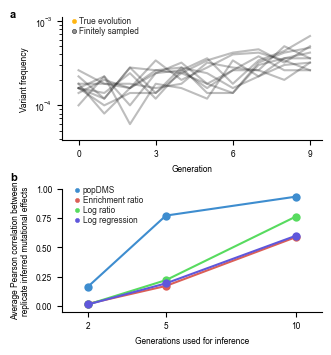

In [4]:
reload(figs)
figs.FIG1_SIMULATION_FINITE_SAMPLING()
plt.show()

### Figure 2. MPL is more consistent across replicates than current methods<a class = "anchor" id = "performance"></a>

/Users/jpb156/Dropbox/git/paper-DMS-inference/figures.py:538: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([name2name[label] for label in x], rotation = 45, ha = 'right')


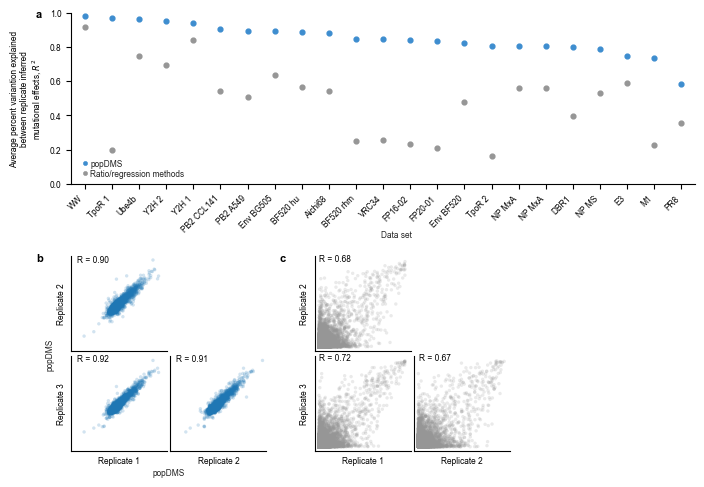

In [24]:
reload(figs)
figs.FIG2_METHODS_COMPARISON()
plt.show()

### Figure 3. Visualizations of MPL_DMS<a class = "anchor" id = "visualization"></a>

/Users/jpb156/Dropbox/git/paper-DMS-inference/figures.py:774: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df_zero)
/Users/jpb156/Dropbox/git/paper-DMS-inference/figures.py:776: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all    = df_all.append(df_zero)
/Users/jpb156/Dropbox/git/paper-DMS-inference/figures.py:783: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(temp_pure)
/Users/jpb156/Dropbox/git/paper-DMS-inference/figures.py:791: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(temp_pure)
/Users/jpb156/Dropbox/git/paper-DMS-inference/figures.py:776: FutureWarning: 

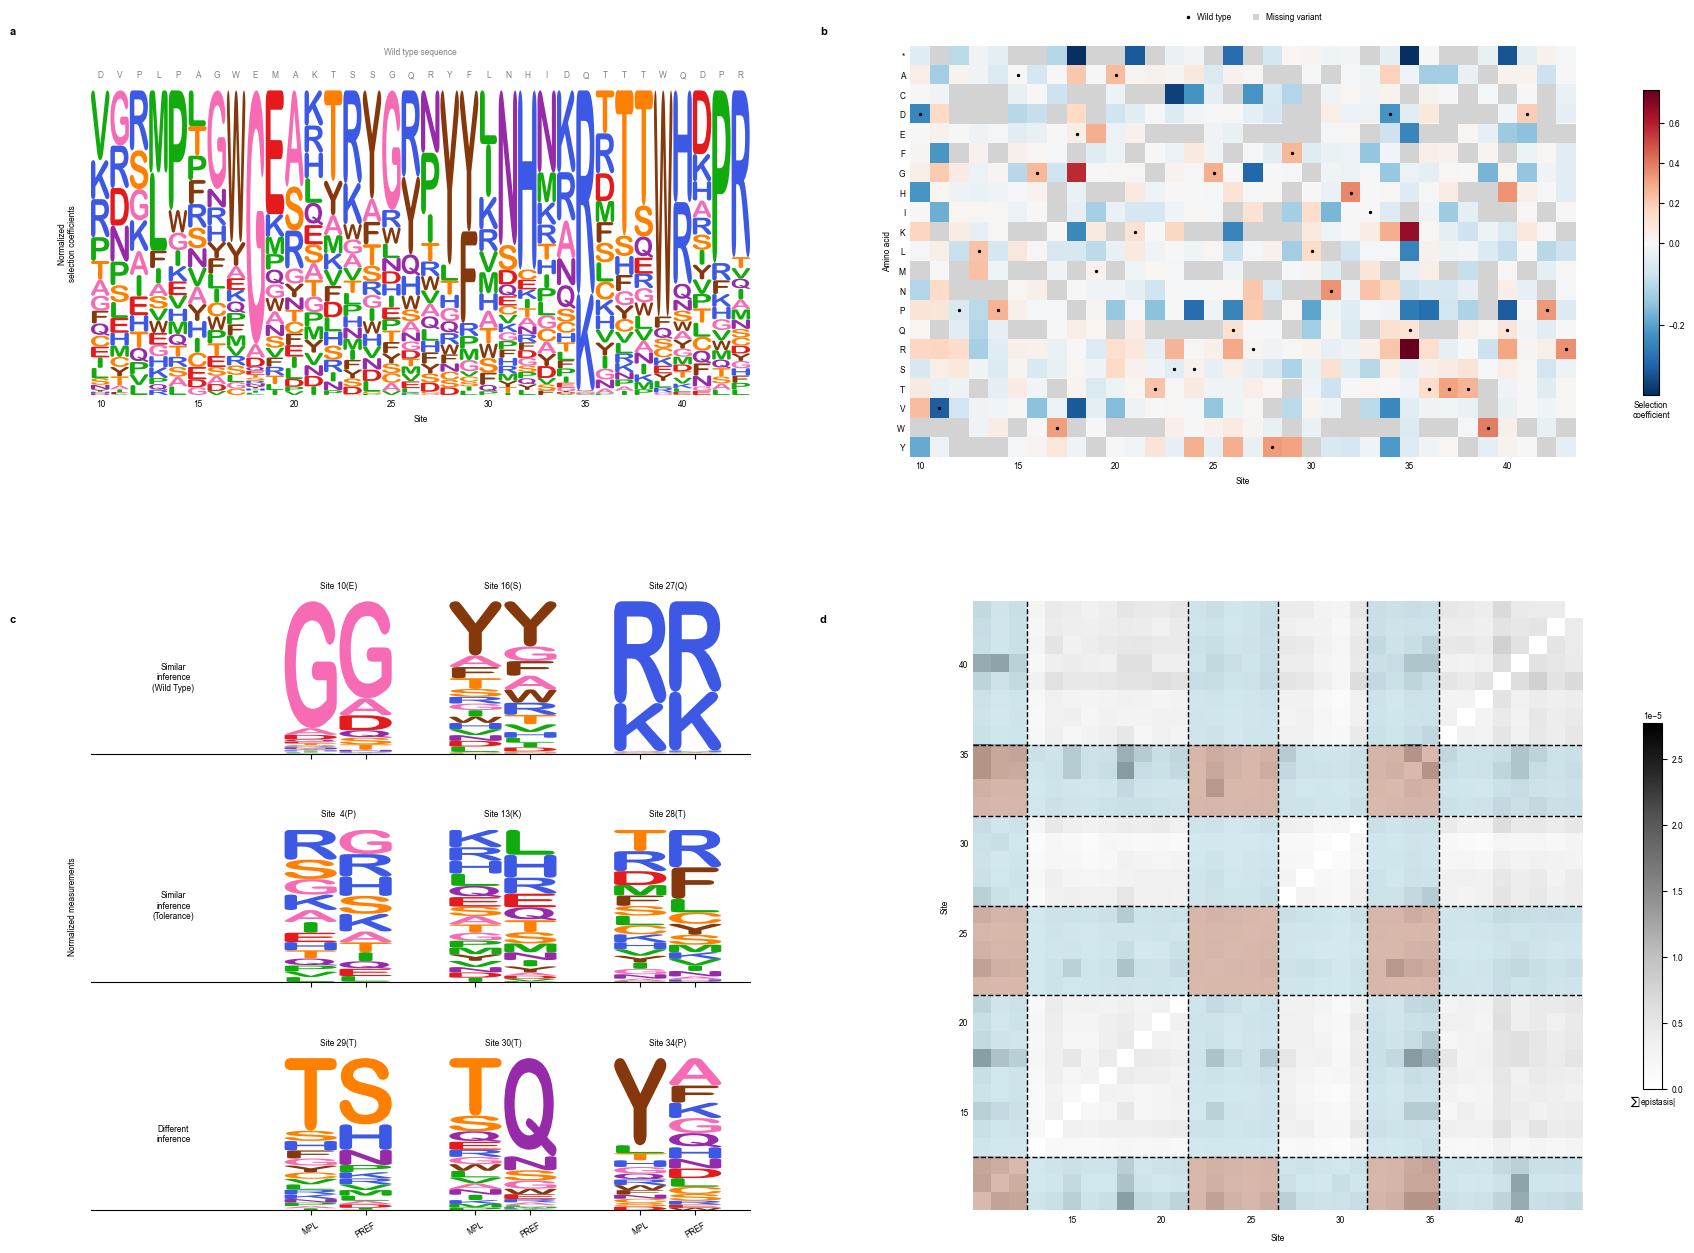

<Figure size 640x480 with 0 Axes>

In [4]:
reload(figs)
figs.FIG3_VISUALIZATION()
plt.show()

### Figure4. Visualizations of Epistasis<a class = "anchor" id = "visualization"></a>

/Users/jpb156/Dropbox/git/paper-DMS-inference/figures.py:989: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_new=df_new.groupby(['site_1_y', 'site_2_y'])['epistasis_paper', 'epistasis_MPL_cons_1'].agg('sum').reset_index()
/Users/jpb156/Dropbox/git/paper-DMS-inference/figures.py:1025: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_MPL = df_unique.groupby(['site_1_y','site_2_y','distance'])['epistasis_MPL_absolute', 'epistasis_paper_absolute'].agg('sum').reset_index().sort_values('epistasis_MPL_absolute')
/Users/jpb156/Dropbox/git/paper-DMS-inference/figures.py:1026: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_func = df_unique.groupby(['site_1_y','site_2_y','distance'])['epistasis_MPL_absolute', 'epistasis_paper_absolute'].agg('sum').reset_

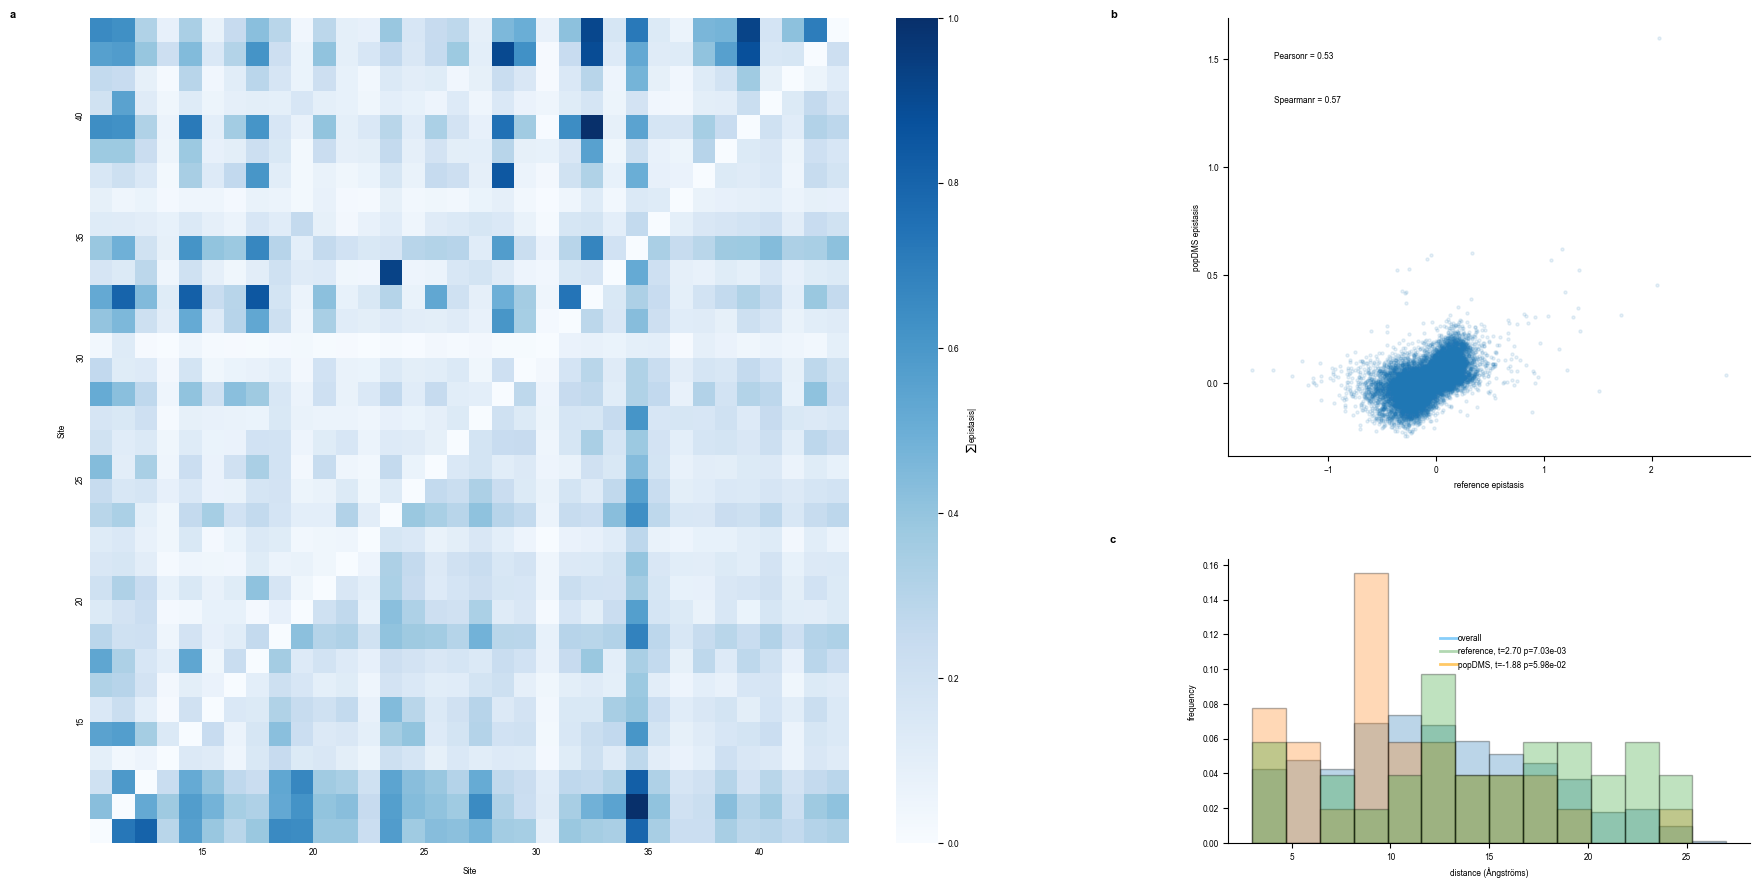

In [5]:
reload(figs)
figs.FIG4_VISUALIZATION()

### Supplemental figure 1. Epistasis scatter<a class = "anchor" id = "epistasis supp"></a>

                         selection_coefficient_x  selection_coefficient_y
selection_coefficient_x                 1.000000                 0.999314
selection_coefficient_y                 0.999314                 1.000000 (34859, 6)


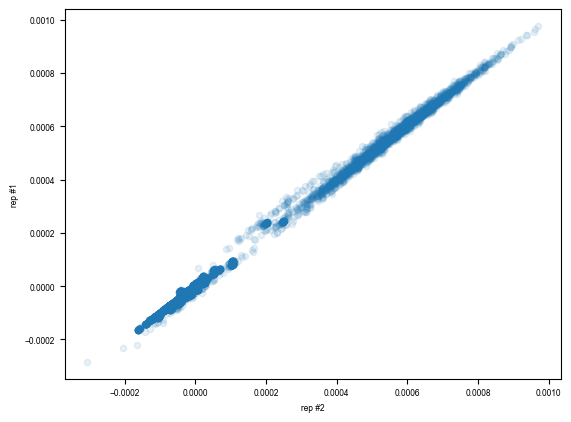

In [6]:
reload(figs)
figs.SUPPFIG1_EPISTASIS()